# Hands on session - water molecule energy predictive model

In [ ]:
import numpy as np

def read_blocks(file_path, num_blocks):
    data = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        
        # Each block has 5 header lines + 3 data lines
        block_size = 5
        for i in range(num_blocks):
            start = i * block_size + 2  # Skip the first two header lines
            block_data = []
            
            for j in range(3):  # Read the three atom lines
                parts = lines[start + j].split()
                block_data.extend(map(float, parts[1:]))  # Store only the coordinates
                
            data.append(block_data)
    
    return np.array(data)


def reading_energies(file_path):

    energies = []
    with open(file_path, 'r') as f:
        for line in f:
            energies.append(float(line))
    return np.array(energies) 

In [ ]:
xyz_train = read_blocks('./data/H2O_unrotated.xyz', 1750)
xyz_test = read_blocks('./data/H2O_test.xyz', 250)
ener_train = reading_energies('./data/H2O_unrotated.ener')
ener_test = reading_energies('./data/H2O_test.ener')

In [3]:
def distances(dataset):
    dist = []
    for i in dataset:
        h1 = i[:3]
        o = i[3:6]
        h2 = i[6:]
        dist.append([h1-h2,o-h1,o-h2])
    return np.array(dist)

def renorm(dataset):
    normal = np.zeros_like(dataset)
    for i in range(dataset.shape[1]):
        normal[:,i] = (dataset[:,i]-dataset[:,i].mean())/dataset[:,i].std()
    return normal
# dist_train = distances(xyz_train).reshape(-1,9)
# dist_test = distances(xyz_test).reshape(-1,9)


norm_train = renorm(xyz_train)

In [4]:
# train_distr = []
# test_distr = []

# for i in range(dist_train.shape[1]):
#     train_distr.append([dist_train[:,i].mean(), dist_train[:,i].std()])
#     test_distr.append([dist_test[:,i].mean(), dist_test[:,i].std()])

# train_distr = np.array(train_distr)
# test_distr = np.array(test_distr)





# norm_train = np.zeros_like(dist_train)
# norm_test = np.zeros_like(dist_test)

# for i in range(dist_train.shape[1]):
#     norm_train[:,i] = (dist_train[:,i]-dist_train[:,i].mean())/dist_train[:,i].std()
#     norm_test[:,i] = (dist_test[:,i]-dist_test[:,i].mean())/dist_test[:,i].std()

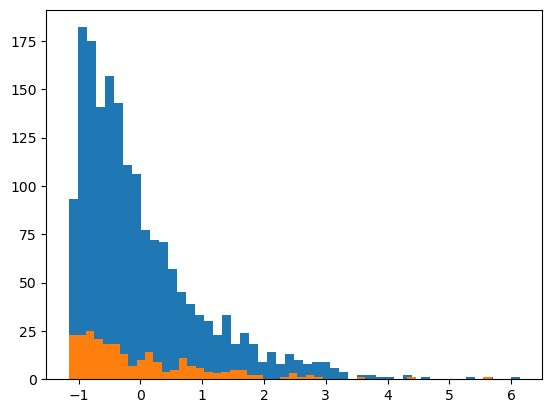

In [5]:
import matplotlib.pyplot as plt

target = (ener_train-np.mean(ener_train))/ener_train.std()
test = (ener_test-np.mean(ener_train))/ener_train.std()
# pol = (pol - pol.mean()) / pol.std()
plt.hist(target, bins=50)
plt.hist(test, bins=50)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Assuming X and y are NumPy arrays
X_train, X_test, y_train, y_test = train_test_split(norm_train, target, test_size=0.2, random_state=42)


In [7]:
import pandas as pd 
features = pd.DataFrame(norm_train)
target = pd.DataFrame(target)

features.to_csv('features_notnormal.csv', columns=None, header=False, index=False)
target.to_csv('target_notnormal.csv', columns=None, header=False, index=False)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers

# Define the model
model = keras.Sequential([
    layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01), input_shape=(9,)),  # First hidden layer
    # layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),  # Second hidden layer
    # layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),  # Second hidden layer
    # layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),  # Second hidden layer
    layers.Dense(1)  # Output layer
])

# loss_1 = keras.losses.MeanSquaredError(
#     reduction="sum", name="mean_squared_error", dtype=None
# )

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

# Print model summary
model.summary()


2025-10-21 15:35:54.271160: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-21 15:35:54.375148: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-21 15:35:54.483770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-21 15:35:54.585136: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-21 15:35:54.607743: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-21 15:35:54.764440: I tensorflow/core/platform/cpu_feature_gu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89 (356.00 B)

 Trainable params: 89 (356.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_test, y_test))
history2 = model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.0812 - mse: 1.7926 - val_loss: 1.4160 - val_mse: 1.1531
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2391 - mse: 0.9819 - val_loss: 1.1090 - val_mse: 0.8685
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9597 - mse: 0.7240 - val_loss: 0.9456 - val_mse: 0.7221
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8773 - mse: 0.6570 - val_loss: 0.8098 - val_mse: 0.5978
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6957 - mse: 0.4863 - val_loss: 0.6906 - val_mse: 0.4886
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6431 - mse: 0.4429 - val_loss: 0.5732 - val_mse: 0.3789
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5143 - mse: 0.3221 - val_loss: 0.4820 - val_mse: 0.2965
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4175 - mse: 0.2342 - val_loss: 0.3966 - val_mse: 0.2173
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - 

In [10]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

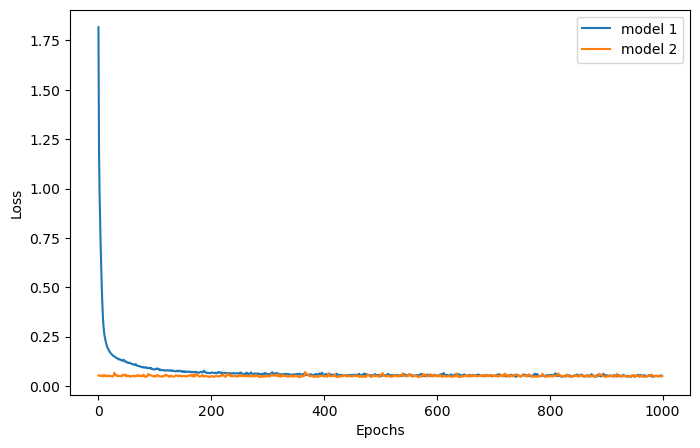

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label="model 1")
plt.plot(history2.history['loss'], label="model 2")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

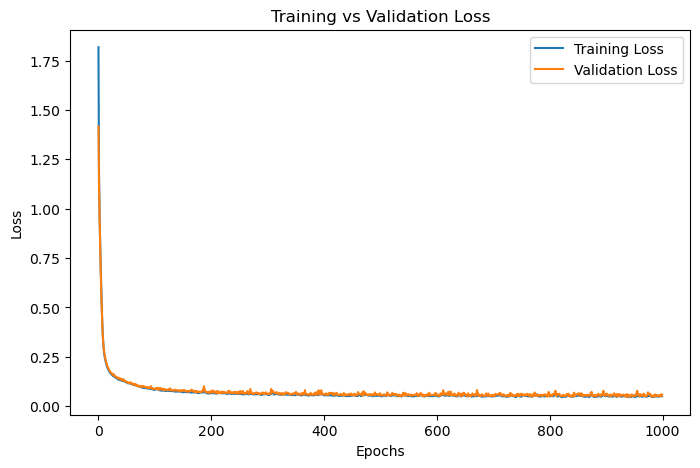

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [13]:
y_pred = model.predict(X_train)
ytest_pred = model.predict(X_test)

 1/44 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


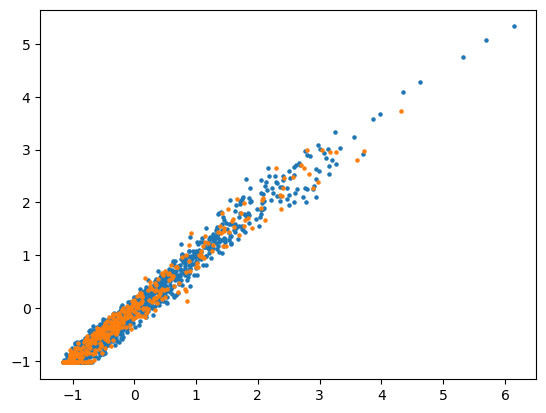

In [16]:
line_x = [min(target),max(target)] # yml is the original dataset, the total
plt.scatter(y_train, y_pred, label= 'test', alpha = 1, s=5)
plt.scatter(y_test, ytest_pred, label= 'test', alpha = 1, s=5)
# plt.plot(line_x,line_x, c='grey', lw = 1.1)#, zorder=0)
plt.show()
